# ```sampley``` exemplar: the segment approach
Before going through this exemplar, please consult the _Introduction to sampley exemplars_ (```intro.ipynb```).
<br>This exemplar illustrates an application of the segment approach to data contained within two files: one containing survey tracks (```sections.gpkg```) and one containing sightings data (```sightings.gpkg```).

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

## Stage 1
In Stage 1, we import two files (```sightings.csv``` and ```sections.gpkg```) and from them make a ```DataPoints``` and a ```Sections``` object, respectively.
<br>Although we use a CSV file and a GPKG file in this exemplar, there are other options for file types (including XLSX and SHP files). Please see the Stage 1 exemplar (```stage-1.ipynb```) in the horizontal exemplars folder or the User Manual for more details. Note that, regardless of the input file type, once any ```DataPoints``` and/or ```Sections``` objects have been made, the subsequent processing will be the same.

In [4]:
u_sightings = DataPoints.from_file(
    filepath=input_folder+'sightings.csv',
    x_col='lon',
    y_col='lat',
    crs_input='EPSG:4326',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00'
)

Success: file successfully input.
Success: x and y (lon/lat) coordinates successfully parsed.
Success: reprojected to CRS 'EPSG:32619'
Success: the column 'datetime' successfully reformatted to datetimes.
Success: the timezone of column 'datetime' successfully set to 'UTC-05:00'.
Success: datapoint IDs successfully generated.


In [5]:
u_sections = Sections.from_file(
    filepath=input_folder+'sections.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime_beg',
    tz_input='UTC-05:00'
)

Success: file successfully input.
Success: reprojected to CRS 'EPSG:32619'
Success: the column 'datetime_beg' successfully reformatted to datetimes.
Success: the timezone of column 'datetime_beg' successfully set to 'UTC-05:00'.
Note: column 'datetime_beg' renamed to 'datetime'.
Success: section IDs successfully generated.


## Stage 2
In Stage 2, we use the ```Sections``` object to make a ```Segments``` object containing segments with a target length of 10000 m.

In [6]:
u_segments = Segments.delimit(
    sections=u_sections,
    var='redistribution',
    target=10000)

In [7]:
u_segments.segments  # print the segments GeoDataFrame

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s1,0.000000,10000.580283
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s1,10000.580283,20001.160565
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s1,20001.160565,30001.740848
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s1,30001.740848,40002.321130
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s1,40002.321130,50002.901413
...,...,...,...,...,...,...,...
64,s65-r10000m,"LINESTRING (652980.044 4697677.144, 652979.945...",POINT (647917.17 4697623.667),2019-02-05,s4,273463.867857,283592.159259
65,s66-r10000m,"LINESTRING (642854.209 4697537.196, 642721.486...",POINT (637791.127 4697454.392),2019-02-05,s4,283592.159259,293720.450662
66,s67-r10000m,"LINESTRING (632727.93 4697356.37, 632683.219 4...",POINT (627664.663 4697262.02),2019-02-05,s4,293720.450662,303848.742064
67,s68-r10000m,"LINESTRING (622602.172 4697152.471, 622357.753...",POINT (617538.774 4697065.46),2019-02-05,s4,303848.742064,313977.033466


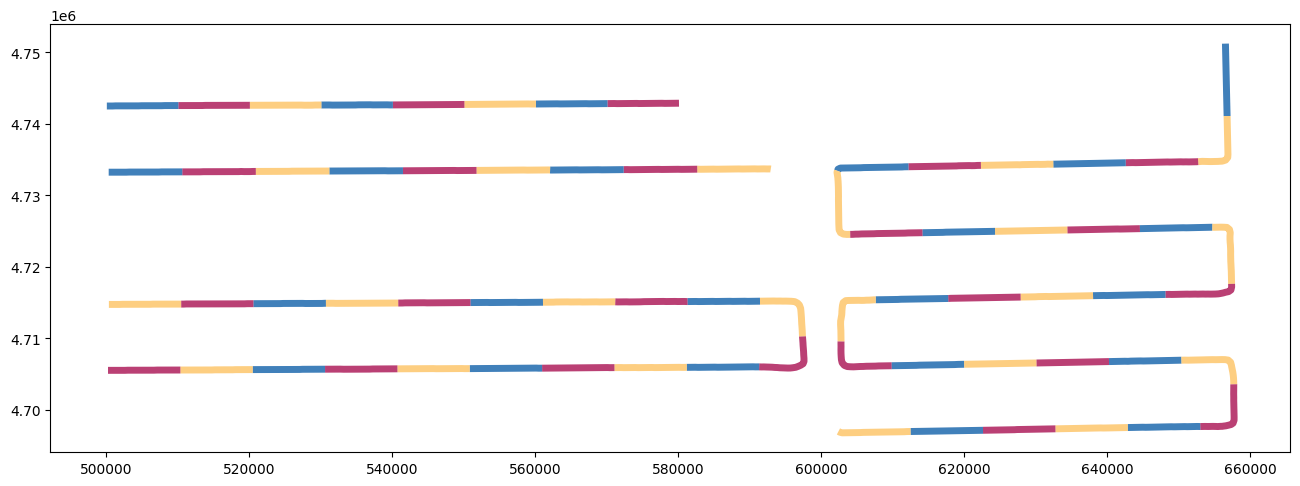

In [8]:
u_segments.plot()  # plot the segments

## Stage 3
In Stage 3, we, firstly, make two ```Samples``` objects:
- one from the ```DataPoints``` object containing sightings data and the ```Segments``` object
- one from the ```Segments``` object

Then, we merge these two ```Samples``` objects to make our final ```Samples``` object.

In [9]:
u_samples_sightings = Samples.segment(
    datapoints=u_sightings,
    segments=u_segments,
    cols={'individuals': 'sum'},
    how='line')

In [10]:
u_samples_effort = Samples.segment_se(segments=u_segments)

In [11]:
u_samples = Samples.merge(
    sightings=u_samples_sightings,
    effort=u_samples_effort)


Note: samples generated with the segment approach


## Output
Finally, we save the final ```Samples``` object to the output folder.

In [12]:
u_samples.save(
    folder=output_folder,
    filetype='csv'
)

In the output folder, there should be two new CSVs: the first should have the same name as the ```Samples``` object (run the box below to see the name) while the second should also have this name but with ```-parameters``` added at the end.

In [13]:
u_samples.name

'samples-sightings+effort-x-segments-r10000m'

The first CSV should contain the samples, like those shown in the box below. 
<br>In this dataframe, each row represents a given segment, i.e., a sample. 
<br>The column ```line``` delimits the extent of the segment, while the column ```midpoint``` represents the centre of the segment.
<br>At the end are the data columns. In this particular example, they are ```individuals``` and ```se_length```.

In [14]:
u_samples.samples

,segment_id,line,midpoint,date,section_id,dfbsec_beg,dfbsec_end,individuals,se_length
0,s01-r10000m,"LINESTRING (580092.757 4742883.408, 579997.135...",POINT (575093.021 4742845.959),2019-01-25,s1,0.000000,10000.580283,1.0,10000.580283
1,s02-r10000m,"LINESTRING (570093.642 4742829.91, 569917.081 ...",POINT (565093.86 4742799.716),2019-01-25,s1,10000.580283,20001.160565,NaN,10000.580283
2,s03-r10000m,"LINESTRING (560093.988 4742773.153, 559864.339...",POINT (555094.071 4742749.107),2019-01-25,s1,20001.160565,30001.740848,2.0,10000.580283
3,s04-r10000m,"LINESTRING (550093.926 4742710.923, 549838.842...",POINT (545093.756 4742676.369),2019-01-25,s1,30001.740848,40002.321130,5.0,10000.580283
4,s05-r10000m,"LINESTRING (540093.561 4742645.442, 539704.822...",POINT (535094.224 4742648.431),2019-01-25,s1,40002.321130,50002.901413,NaN,10000.580283
...,...,...,...,...,...,...,...,...,...
64,s65-r10000m,"LINESTRING (652980.044 4697677.144, 652979.945...",POINT (647917.17 4697623.667),2019-02-05,s4,273463.867857,283592.159259,NaN,10128.291402
65,s66-r10000m,"LINESTRING (642854.209 4697537.196, 642721.486...",POINT (637791.127 4697454.392),2019-02-05,s4,283592.159259,293720.450662,NaN,10128.291402
66,s67-r10000m,"LINESTRING (632727.93 4697356.37, 632683.219 4...",POINT (627664.663 4697262.02),2019-02-05,s4,293720.450662,303848.742064,NaN,10128.291402
67,s68-r10000m,"LINESTRING (622602.172 4697152.471, 622357.753...",POINT (617538.774 4697065.46),2019-02-05,s4,303848.742064,313977.033466,2.0,10128.291402


The second CSV should contain the parameters, like those shown in the box below (but arranged in a table). This information may prove useful if, later, we need to know  how the samples were generated.

In [15]:
u_samples.parameters

{'name': 'samples-sightings+effort-x-segments-r10000m',
 'names': 'samples-datapoints-sightings-x-segments-r10000m+samples-sections-sections-x-segments-r10000m',
 'approach': 'segment',
 'resampled': 'datapoints; effort',
 'datapoints_name': 'datapoints-sightings; nan',
 'datapoints_filepath': './input/sightings.csv; nan',
 'datapoints_crs': 'EPSG:32619; nan',
 'datapoints_tz': 'UTC-05:00; nan',
 'datapoints_data_cols': 'individuals; nan',
 'segments_name': 'segments-r10000m',
 'sections_name': 'sections-sections',
 'segments_crs': 'EPSG:32619',
 'segments_var': 'redistribution',
 'segments_randomise': 'False',
 'segments_target': '10000',
 'segments_unit': 'metre',
 'cols': "{'individuals': 'sum'}; nan",
 'effort_esw': 'nan; None',
 'effort_audf': 'nan; None',
 'effort_euc-geo': 'nan; euclidean'}